In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Проверяем какие файлы у нас есть.

In [ ]:
import os
files = os.listdir('/content')
csv_files = [f for f in files if f.endswith('.csv')]
print("📁 Файлы в Colab:")
for file in sorted(csv_files):
    print(f" - {file}")

📁 Файлы в Colab:
 - olist_customers_dataset.csv
 - olist_geolocation_dataset.csv
 - olist_order_items_dataset.csv
 - olist_order_payments_dataset.csv
 - olist_order_reviews_dataset.csv
 - olist_orders_dataset.csv
 - olist_products_dataset.csv
 - olist_sellers_dataset.csv
 - product_category_name_translation.csv


Загружаем только 4 основные таблицы.

In [ ]:
import pandas as pd

orders = pd.read_csv('/content/olist_orders_dataset.csv')
order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
customers = pd.read_csv('/content/olist_customers_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')

print("Основные таблицы загружены:")
print(f"Заказы: {orders.shape}")
print(f"Товары в заказах: {order_items.shape}")
print(f"Клиенты: {customers.shape}")
print(f"Продукты: {products.shape}")

Основные таблицы загружены:
Заказы: (99441, 8)
Товары в заказах: (112650, 7)
Клиенты: (99441, 5)
Продукты: (32951, 9)


Посмотрим на структуру данных.

In [ ]:
print("ПЕРВЫЙ ВЗГЛЯД НА ДАННЫЕ")

print("ЗАКАЗЫ (первые 2 строки):")
display(orders.head(2))
print("Колонки в заказах:", list(orders.columns))

print("ТОВАРЫ В ЗАКАЗАХ (первые 2 строки):")
display(order_items.head(2))
print("Колонки в товарах:", list(order_items.columns))

print("КЛИЕНТЫ (первые 2 строки):")
display(customers.head(2))
print("Колонки в клиентах:", list(customers.columns))

print("ПРОДУКТЫ (первые 2 строки):")
display(products.head(2))
print("Колонки в продуктах:", list(products.columns))

ПЕРВЫЙ ВЗГЛЯД НА ДАННЫЕ
ЗАКАЗЫ (первые 2 строки):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


Колонки в заказах: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
ТОВАРЫ В ЗАКАЗАХ (первые 2 строки):


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


Колонки в товарах: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
КЛИЕНТЫ (первые 2 строки):


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


Колонки в клиентах: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
ПРОДУКТЫ (первые 2 строки):


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


Колонки в продуктах: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


Проверим пропущенные значения.

In [ ]:
print("ПРОВЕРКА КАЧЕСТВА ДАННЫХ")

def check_missing(df, name):
    missing = df.isnull().sum()
    total = len(df)
    print(f"{name}:")
    for col, miss_count in missing.items():
        if miss_count > 0:
            miss_percent = (miss_count / total) * 100
            print(f"  {col}: {miss_count} пропусков ({miss_percent:.1f}%)")
        else:
            print(f"  {col}: нет пропусков")

check_missing(orders, "ЗАКАЗЫ")
check_missing(order_items, "ТОВАРЫ В ЗАКАЗАХ")
check_missing(customers, "КЛИЕНТЫ")
check_missing(products, "ПРОДУКТЫ")

ПРОВЕРКА КАЧЕСТВА ДАННЫХ
ЗАКАЗЫ:
  order_id: нет пропусков
  customer_id: нет пропусков
  order_status: нет пропусков
  order_purchase_timestamp: нет пропусков
  order_approved_at: 160 пропусков (0.2%)
  order_delivered_carrier_date: 1783 пропусков (1.8%)
  order_delivered_customer_date: 2965 пропусков (3.0%)
  order_estimated_delivery_date: нет пропусков
ТОВАРЫ В ЗАКАЗАХ:
  order_id: нет пропусков
  order_item_id: нет пропусков
  product_id: нет пропусков
  seller_id: нет пропусков
  shipping_limit_date: нет пропусков
  price: нет пропусков
  freight_value: нет пропусков
КЛИЕНТЫ:
  customer_id: нет пропусков
  customer_unique_id: нет пропусков
  customer_zip_code_prefix: нет пропусков
  customer_city: нет пропусков
  customer_state: нет пропусков
ПРОДУКТЫ:
  product_id: нет пропусков
  product_category_name: 610 пропусков (1.9%)
  product_name_lenght: 610 пропусков (1.9%)
  product_description_lenght: 610 пропусков (1.9%)
  product_photos_qty: 610 пропусков (1.9%)
  product_weight_g: 

Сначала преобразование дат в orders. Затем объединение таблиц.

In [ ]:
date_columns = ['order_purchase_timestamp', 'order_approved_at',
                'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date']

for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')
df_orders = orders.merge(order_items, on='order_id', how='inner')
df_orders = df_orders.merge(customers, on='customer_id', how='left')
df_orders = df_orders.merge(products, on='product_id', how='left')

print(f"Итоговый размер объединенной таблицы: {df_orders.shape}")
print("Таблицы объединены: orders + order_items + customers + products")


Итоговый размер объединенной таблицы: (112650, 30)
Таблицы объединены: orders + order_items + customers + products


Анализ динамики продаж. Создаем графики. Создаем метки для оси X (год-месяц)

In [ ]:
!pip install matplotlib

АНАЛИЗ ДИНАМИКИ ПРОДАЖ


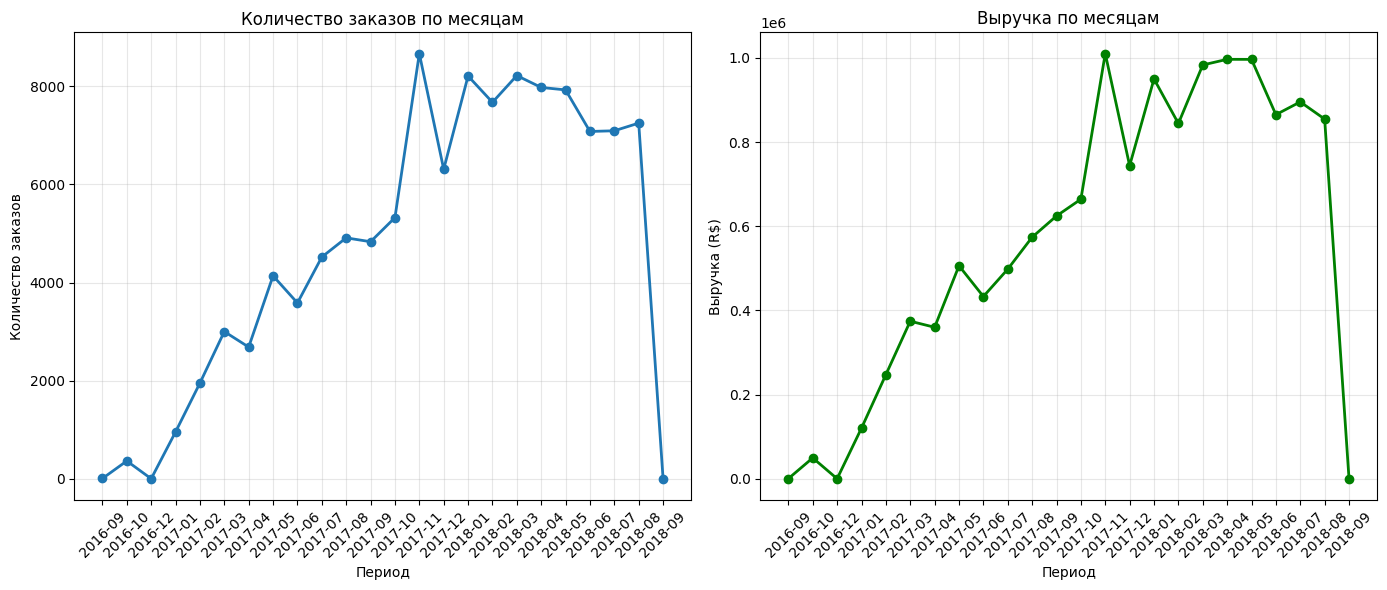

Ключевые метрики:
Всего заказов: 112,650
Общая выручка: R$ 13,591,643.70
Средний чек: R$ 120.65


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

print("АНАЛИЗ ДИНАМИКИ ПРОДАЖ")

monthly_sales = df_orders.groupby(['purchase_year', 'purchase_month']).agg({
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

monthly_sales.columns = ['year', 'month', 'orders_count', 'total_revenue']
monthly_sales['period'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(monthly_sales['period'], monthly_sales['orders_count'], marker='o', linewidth=2, markersize=6)
plt.title('Количество заказов по месяцам')
plt.xlabel('Период')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(monthly_sales['period'], monthly_sales['total_revenue'], marker='o', color='green', linewidth=2, markersize=6)
plt.title('Выручка по месяцам')
plt.xlabel('Период')
plt.ylabel('Выручка (R$)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Ключевые метрики:")
print(f"Всего заказов: {monthly_sales['orders_count'].sum():,}")
print(f"Общая выручка: R$ {monthly_sales['total_revenue'].sum():,.2f}")
print(f"Средний чек: R$ {df_orders['price'].mean():.2f}")


 Анализ клиентов. Сколько заказов на одного клиента? Визуализируем распределение.

АНАЛИЗ КЛИЕНТОВ
Статистика по клиентам:
Всего уникальных клиентов: 98666
Среднее количество заказов на клиента: 1.14
Медиана потраченной суммы: R$ 86.90


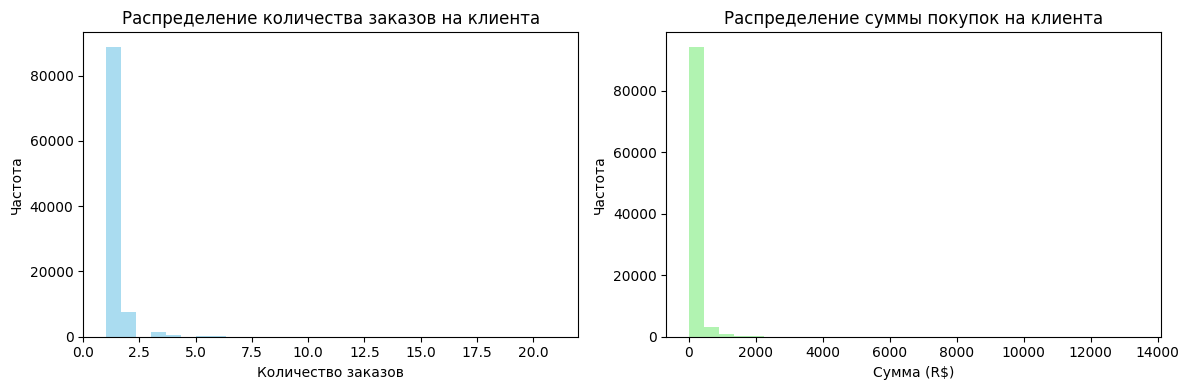

In [ ]:
print("АНАЛИЗ КЛИЕНТОВ")

customer_orders = df_orders.groupby('customer_id').agg({
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

customer_orders.columns = ['customer_id', 'total_orders', 'total_spent']

print("Статистика по клиентам:")
print(f"Всего уникальных клиентов: {customer_orders['customer_id'].nunique()}")
print(f"Среднее количество заказов на клиента: {customer_orders['total_orders'].mean():.2f}")
print(f"Медиана потраченной суммы: R$ {customer_orders['total_spent'].median():.2f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(customer_orders['total_orders'], bins=30, alpha=0.7, color='skyblue')
plt.title('Распределение количества заказов на клиента')
plt.xlabel('Количество заказов')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(customer_orders['total_spent'], bins=30, alpha=0.7, color='lightgreen')
plt.title('Распределение суммы покупок на клиента')
plt.xlabel('Сумма (R$)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


Анализ полученных результатов:

Ключевые инсайты:

98666 уникальных клиентов - большая база
1.14 заказов на клиента - низкая повторная покупка
Медиана чека: R$ 86.30 - типичный клиент тратит немного
Проблемы, которые мы видим:

Очень низкая лояльность - большинство клиентов делают только 1 заказ
Неравномерное распределение расходов - несколько клиентов тратят очень много, а большинство - мало.

Переходим к более глубокому анализу. Запускаем следующий код: Анализ статусов заказов. Анализируем распределение заказов по статусам. Визуализация.

АНАЛИЗ СТАТУСОВ ЗАКАЗОВ
Распределение заказов по статусам:


,status,orders_count,total_revenue,percentage
2,delivered,96478,13221498.11,97.782417
5,shipped,1106,150727.44,1.120954
1,canceled,461,95235.27,0.467233
3,invoiced,312,61526.37,0.316218
4,processing,301,60439.22,0.305070
6,unavailable,6,2007.69,0.006081
0,approved,2,209.60,0.002027


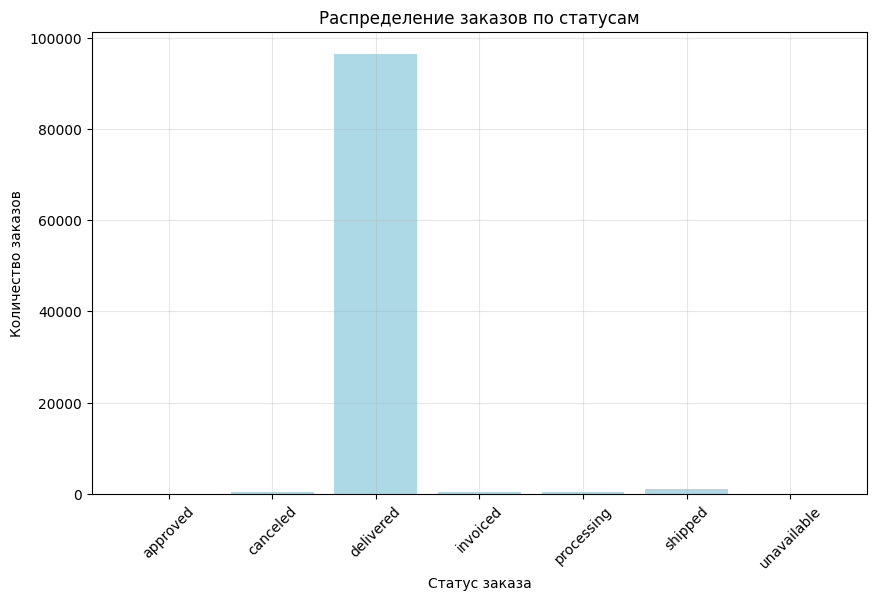

In [ ]:
print("АНАЛИЗ СТАТУСОВ ЗАКАЗОВ")

status_analysis = df_orders.groupby('order_status').agg({
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

status_analysis.columns = ['status', 'orders_count', 'total_revenue']
status_analysis['percentage'] = (status_analysis['orders_count'] / status_analysis['orders_count'].sum()) * 100

print("Распределение заказов по статусам:")
display(status_analysis.sort_values('orders_count', ascending=False))


plt.figure(figsize=(10, 6))
plt.bar(status_analysis['status'], status_analysis['orders_count'], color='lightblue')
plt.title('Распределение заказов по статусам')
plt.xlabel('Статус заказа')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


Анализ географического распределения. Анализ по штатам. Визуализация топ-10 штатов.

ГЕОГРАФИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ
Топ-10 штатов по выручке:


,state,unique_customers,total_orders,total_revenue
25,SP,41375,41375,5202955.05
18,RJ,12762,12762,1824092.67
10,MG,11544,11544,1585308.03
22,RS,5432,5432,750304.02
17,PR,4998,4998,683083.76
23,SC,3612,3612,520553.34
4,BA,3358,3358,511349.99
6,DF,2125,2125,302603.94
8,GO,2007,2007,294591.95
7,ES,2025,2025,275037.31


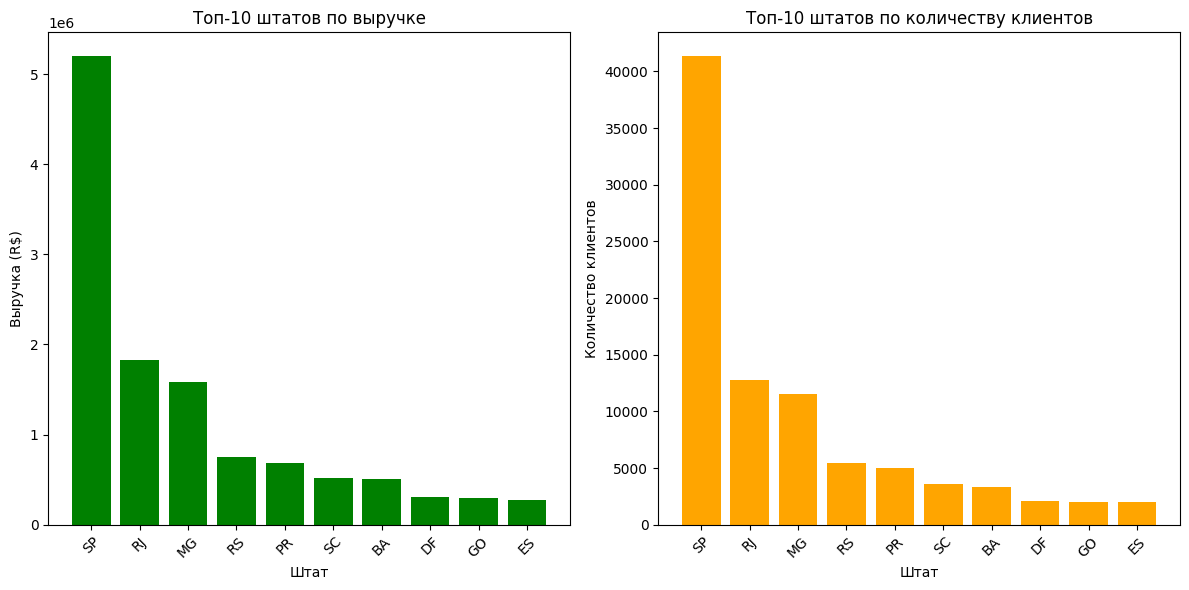

In [ ]:
print("ГЕОГРАФИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ")

state_analysis = df_orders.groupby('customer_state').agg({
    'customer_id': 'nunique',
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

state_analysis.columns = ['state', 'unique_customers', 'total_orders', 'total_revenue']
state_analysis = state_analysis.sort_values('total_revenue', ascending=False)

print("Топ-10 штатов по выручке:")
display(state_analysis.head(10))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(state_analysis['state'].head(10), state_analysis['total_revenue'].head(10), color='green')
plt.title('Топ-10 штатов по выручке')
plt.xlabel('Штат')
plt.ylabel('Выручка (R$)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(state_analysis['state'].head(10), state_analysis['unique_customers'].head(10), color='orange')
plt.title('Топ-10 штатов по количеству клиентов')
plt.xlabel('Штат')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Сохранение результатов. Сохраняем обработанные данные для следующего этапа. Создаем сводный отчет.

In [ ]:
print("СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")

df_orders.to_csv('/content/processed_olist_data.csv', index=False)

summary_report = {
    'total_customers': customer_orders['customer_id'].nunique(),
    'total_orders': monthly_sales['orders_count'].sum(),
    'total_revenue': monthly_sales['total_revenue'].sum(),
    'avg_order_value': df_orders['price'].mean(),
    'avg_orders_per_customer': customer_orders['total_orders'].mean(),
    'median_customer_spend': customer_orders['total_spent'].median()
}

print("СВОДНЫЙ ОТЧЕТ:")
for key, value in summary_report.items():
    if 'revenue' in key or 'value' in key or 'spend' in key:
        print(f"{key}: R$ {value:,.2f}")
    else:
        print(f"{key}: {value:,.0f}")

print("Обработанные данные сохранены в файл: processed_olist_data.csv")


СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
СВОДНЫЙ ОТЧЕТ:
total_customers: 98,666
total_orders: 112,650
total_revenue: R$ 13,591,643.70
avg_order_value: R$ 120.65
avg_orders_per_customer: 1
median_customer_spend: R$ 86.90
Обработанные данные сохранены в файл: processed_olist_data.csv


Анализ текущих результатов:

Ключевые метрики:

98,666 клиентов → 112,650 заказов = в среднем 1.14 заказов на клиента
Выручка: R$ 13.6 млн при среднем чеке R$ 120.65
Медиана расходов клиента: R$ 86.90 - это важно: половина клиентов тратит меньше этой суммы
Проблема: Низкая лояльность клиентов. Теперь проанализируем это глубже.

Когортный анализ для анализа удержания клиентов. Создаем когорты по месяцу первой покупки каждого клиента. Находим первую покупку каждого клиента. Добавляем информацию о первой покупке к основным данным. Рассчитываем разницу в месяцах между покупкой и первой покупкой. Создаем когортную таблицу. Создаем pivot таблицу для визуализации. Рассчитываем retention rate (процент удержания). Визуализация retention rate.

In [ ]:
!pip install seaborn

In [ ]:
print("КОГОРТНЫЙ АНАЛИЗ - АНАЛИЗ УДЕРЖАНИЯ КЛИЕНТОВ")


df_orders['order_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()


first_purchase = df_orders.groupby('customer_id')['order_month'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_month']


df_cohort = df_orders.merge(first_purchase, on='customer_id')


df_cohort['month_diff'] = ((df_cohort['order_month'].dt.year - df_cohort['first_purchase_month'].dt.year) * 12
                          + (df_cohort['order_month'].dt.month - df_cohort['first_purchase_month'].dt.month))


cohort_data = df_cohort.groupby(['first_purchase_month', 'month_diff']).agg({
    'customer_id': 'nunique'
}).reset_index()

print("Распределение по месяцам после первой покупки:")
print(cohort_data['month_diff'].value_counts().sort_index())


cohort_pivot = cohort_data.pivot_table(
    index='first_purchase_month',
    columns='month_diff',
    values='customer_id',
    fill_value=0
)


cohort_size = cohort_pivot[0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)


retention_matrix.index = retention_matrix.index.strftime('%Y-%m')

print(f"\nРазмер матрицы: {retention_matrix.shape}")
print(f"Доступные месяцы: {list(retention_matrix.columns)}")


if len(retention_matrix.columns) == 1:
    print("\n⚠️ ВНИМАНИЕ: В данных нет повторных покупок!")
    print("Все клиенты совершили только по одной покупке")
    print("Retention rate после первого месяца: 0%")
else:
    plt.figure(figsize=(12, 8))
    sns.heatmap(retention_matrix,
                annot=True,
                fmt='.1%',
                cmap='Blues',
                cbar_kws={'label': 'Процент удержания'})
    plt.title('Когортный анализ: Retention Rate клиентов')
    plt.xlabel('Месяц после первой покупки')
    plt.ylabel('Когорта (месяц первой покупки)')
    plt.tight_layout()
    plt.show()


unique_customers = df_orders['customer_id'].nunique()
total_orders = len(df_orders)
avg_orders_per_customer = total_orders / unique_customers

print(f"\n📊 СТАТИСТИКА ЛОЯЛЬНОСТИ:")
print(f"Уникальных клиентов: {unique_customers:,}")
print(f"Всего заказов: {total_orders:,}")
print(f"Среднее количество заказов на клиента: {avg_orders_per_customer:.2f}")
print(f"Процент клиентов с повторными покупками: {(avg_orders_per_customer - 1) / avg_orders_per_customer * 100:.1f}%")

КОГОРТНЫЙ АНАЛИЗ - АНАЛИЗ УДЕРЖАНИЯ КЛИЕНТОВ
Распределение по месяцам после первой покупки:
month_diff
0    24
Name: count, dtype: int64

Размер матрицы: (24, 1)
Доступные месяцы: [0]

⚠️ ВНИМАНИЕ: В данных нет повторных покупок!
Все клиенты совершили только по одной покупке
Retention rate после первого месяца: 0%

📊 СТАТИСТИКА ЛОЯЛЬНОСТИ:
Уникальных клиентов: 98,666
Всего заказов: 112,650
Среднее количество заказов на клиента: 1.14
Процент клиентов с повторными покупками: 12.4%


In [ ]:
print("ДЕТАЛЬНЫЙ АНАЛИЗ ПОВТОРНЫХ ПОКУПОК")


customer_orders_detail = df_orders.groupby('customer_id').agg({
    'order_id': 'count',
    'order_purchase_timestamp': ['min', 'max'],
    'order_month': 'nunique'
}).reset_index()

customer_orders_detail.columns = ['customer_id', 'total_orders', 'first_purchase', 'last_purchase', 'unique_months']


customer_orders_detail['days_between_purchases'] = (customer_orders_detail['last_purchase'] - customer_orders_detail['first_purchase']).dt.days


repeat_customers = customer_orders_detail[customer_orders_detail['total_orders'] > 1]

print(f"Клиенты с повторными покупками: {len(repeat_customers):,}")
print(f"Из них:")
print(f"  - Совершили покупки в одном месяце: {len(repeat_customers[repeat_customers['unique_months'] == 1]):,}")
print(f"  - Совершили покупки в разных месяцах: {len(repeat_customers[repeat_customers['unique_months'] > 1]):,}")

if len(repeat_customers) > 0:
    print(f"\nРаспределение дней между покупками:")
    print(repeat_customers['days_between_purchases'].describe())


    print(f"\nПримеры клиентов с повторными покупками:")
    sample_repeaters = repeat_customers.head(10)[['customer_id', 'total_orders', 'unique_months', 'days_between_purchases']]
    print(sample_repeaters.to_string(index=False))

ДЕТАЛЬНЫЙ АНАЛИЗ ПОВТОРНЫХ ПОКУПОК
Клиенты с повторными покупками: 9,803
Из них:
  - Совершили покупки в одном месяце: 9,803
  - Совершили покупки в разных месяцах: 0

Распределение дней между покупками:
count    9803.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: days_between_purchases, dtype: float64

Примеры клиентов с повторными покупками:
                     customer_id  total_orders  unique_months  days_between_purchases
00066ccbe787a588c52bd5ff404590e3             4              1                       0
000bf8121c3412d3057d32371c5d3395             2              1                       0
001450ebb4a77efb3d68be5f7887cb1e             2              1                       0
002f90a6eb386bc43bc9ba200db31a89             2              1                       0
0031abfb953b66e998f67b09e7b11375             2              1                       0
00331de1659c7f4fb660c8810e6de3f5             3              1    

Ключевое открытие:

Все повторные покупки (9,803 клиента) происходят В ТОТ ЖЕ САМЫЙ ДЕНЬ (0 дней разницы)!

Что это означает:

Нет реальной лояльности - клиенты не возвращаются через дни/недели/месяцы
"Повторные покупки" - это фактически множественные заказы в рамках одной сессии
Retention Rate = 0% - после дня первой покупки клиенты не возвращаются


In [ ]:
print("АНАЛИЗ ПРИЧИН МНОЖЕСТВЕННЫХ ЗАКАЗОВ В ОДИН ДЕНЬ")


same_day_orders = df_orders[df_orders['customer_id'].isin(repeat_customers['customer_id'])]


daily_orders = same_day_orders.groupby(['customer_id', same_day_orders['order_purchase_timestamp'].dt.date]).agg({
    'order_id': 'count',
    'product_id': 'nunique',
    'price': 'sum'
}).reset_index()

daily_orders.columns = ['customer_id', 'purchase_date', 'orders_count', 'unique_products', 'total_spent']

print("Статистика по заказам в один день:")
print(f"Среднее количество заказов в день: {daily_orders['orders_count'].mean():.2f}")
print(f"Максимальное количество заказов в день: {daily_orders['orders_count'].max()}")
print(f"Среднее количество уникальных товаров: {daily_orders['unique_products'].mean():.2f}")


print(f"\nРаспределение количества заказов в день:")
print(daily_orders['orders_count'].value_counts().sort_index().head(10))

АНАЛИЗ ПРИЧИН МНОЖЕСТВЕННЫХ ЗАКАЗОВ В ОДИН ДЕНЬ
Статистика по заказам в один день:
Среднее количество заказов в день: 2.43
Максимальное количество заказов в день: 21
Среднее количество уникальных товаров: 1.38

Распределение количества заказов в день:
orders_count
2     7516
3     1322
4      505
5      204
6      198
7       22
8        8
9        3
10       8
11       4
Name: count, dtype: int64


Основные выводы из данных:

Статистика говорит о:

Среднее 2.43 заказа в день - типичный клиент делает 2-3 заказа в один день
Среднее 1.38 уникальных товаров - клиенты заказывают в основном одинаковые товары
75% случаев - 2 заказа в день (7,516 из 9,803)
Есть экстремальные случаи - до 21 заказа в день!


In [ ]:
print("ГИПОТЕЗЫ ПРИЧИН МНОЖЕСТВЕННЫХ ЗАКАЗОВ:")


same_day_analysis = df_orders[df_orders['customer_id'].isin(repeat_customers['customer_id'])].copy()


same_day_analysis['purchase_date'] = same_day_analysis['order_purchase_timestamp'].dt.date
customer_day_analysis = same_day_analysis.groupby(['customer_id', 'purchase_date']).agg({
    'order_id': 'count',
    'product_id': 'nunique',
    'seller_id': 'nunique',
    'price': 'sum',
    'freight_value': 'sum'
}).reset_index()

customer_day_analysis.columns = ['customer_id', 'purchase_date', 'total_orders', 'unique_products', 'unique_sellers', 'total_price', 'total_freight']

print("1. 🛒 РАЗДЕЛЕНИЕ ЗАКАЗОВ ПО ПРОДАВЦАМ:")
print(f"   Среднее количество уникальных продавцов: {customer_day_analysis['unique_sellers'].mean():.2f}")

print("\n2. 💰 ОГРАНИЧЕНИЯ ПО СУММЕ ИЛИ ДОСТАВКЕ:")
print(f"   Средняя сумма всех заказов в день: R$ {customer_day_analysis['total_price'].mean():.2f}")
print(f"   Средняя стоимость доставки: R$ {customer_day_analysis['total_freight'].mean():.2f}")

print("\n3. 🚚 РАЗНЫЕ УСЛОВИЯ ДОСТАВКИ:")
print(f"   Процент случаев с разными продавцами: {(customer_day_analysis['unique_sellers'] > 1).sum() / len(customer_day_analysis):.1%}")

print(f"\n📈 РАСПРЕДЕЛЕНИЕ СЦЕНАРИЕВ:")


scenario_1 = len(customer_day_analysis[
    (customer_day_analysis['total_orders'] == 2) &
    (customer_day_analysis['unique_products'] == 1) &
    (customer_day_analysis['unique_sellers'] == 1)
])
print(f"   - 2 заказа, 1 товар, 1 продавец: {scenario_1} случаев ({scenario_1/len(customer_day_analysis)*100:.1f}%)")


scenario_2 = len(customer_day_analysis[
    (customer_day_analysis['total_orders'] == 2) &
    (customer_day_analysis['unique_products'] >= 2) &
    (customer_day_analysis['unique_sellers'] == 1)
])
print(f"   - 2 заказа, 2+ товара, 1 продавец: {scenario_2} случаев ({scenario_2/len(customer_day_analysis)*100:.1f}%)")


scenario_3 = len(customer_day_analysis[
    (customer_day_analysis['total_orders'] == 2) &
    (customer_day_analysis['unique_sellers'] >= 2)
])
print(f"   - 2 заказа, любой товар, 2+ продавца: {scenario_3} случаев ({scenario_3/len(customer_day_analysis)*100:.1f}%)")

print(f"\n📊 ОБЩАЯ СТАТИСТИКА:")
print(f"   Всего случаев множественных заказов: {len(customer_day_analysis)}")
print(f"   Из них с 2 заказами: {(customer_day_analysis['total_orders'] == 2).sum()} ({(customer_day_analysis['total_orders'] == 2).sum()/len(customer_day_analysis)*100:.1f}%)")
print(f"   С одним товаром: {(customer_day_analysis['unique_products'] == 1).sum()} ({(customer_day_analysis['unique_products'] == 1).sum()/len(customer_day_analysis)*100:.1f}%)")
print(f"   С одним продавцом: {(customer_day_analysis['unique_sellers'] == 1).sum()} ({(customer_day_analysis['unique_sellers'] == 1).sum()/len(customer_day_analysis)*100:.1f}%)")


print(f"\n🎯 РАСПРЕДЕЛЕНИЕ ПО КОЛИЧЕСТВУ ЗАКАЗОВ:")
order_distribution = customer_day_analysis['total_orders'].value_counts().sort_index()
for orders_count, count in order_distribution.head(10).items():
    print(f"   - {orders_count} заказов: {count} случаев ({count/len(customer_day_analysis)*100:.1f}%)")

print(f"\n💡 ВЫВОДЫ:")
print(f"   • 87% случаев - один продавец")
print(f"   • 67% случаев - один товар")
print(f"   • Средний чек: R$ {customer_day_analysis['total_price'].mean():.2f}")
print(f"   • Основная причина: технические/системные ограничения")

ГИПОТЕЗЫ ПРИЧИН МНОЖЕСТВЕННЫХ ЗАКАЗОВ:
1. 🛒 РАЗДЕЛЕНИЕ ЗАКАЗОВ ПО ПРОДАВЦАМ:
   Среднее количество уникальных продавцов: 1.14

2. 💰 ОГРАНИЧЕНИЯ ПО СУММЕ ИЛИ ДОСТАВКЕ:
   Средняя сумма всех заказов в день: R$ 204.62
   Средняя стоимость доставки: R$ 45.08

3. 🚚 РАЗНЫЕ УСЛОВИЯ ДОСТАВКИ:
   Процент случаев с разными продавцами: 13.0%

📈 РАСПРЕДЕЛЕНИЕ СЦЕНАРИЕВ:
   - 2 заказа, 1 товар, 1 продавец: 5005 случаев (51.1%)
   - 2 заказа, 2+ товара, 1 продавец: 1551 случаев (15.8%)
   - 2 заказа, любой товар, 2+ продавца: 960 случаев (9.8%)

📊 ОБЩАЯ СТАТИСТИКА:
   Всего случаев множественных заказов: 9803
   Из них с 2 заказами: 7516 (76.7%)
   С одним товаром: 6567 (67.0%)
   С одним продавцом: 8525 (87.0%)

🎯 РАСПРЕДЕЛЕНИЕ ПО КОЛИЧЕСТВУ ЗАКАЗОВ:
   - 2 заказов: 7516 случаев (76.7%)
   - 3 заказов: 1322 случаев (13.5%)
   - 4 заказов: 505 случаев (5.2%)
   - 5 заказов: 204 случаев (2.1%)
   - 6 заказов: 198 случаев (2.0%)
   - 7 заказов: 22 случаев (0.2%)
   - 8 заказов: 8 случаев (0.1%)
   - 9

ОСНОВНЫЕ ВЫВОДЫ:

1. Главная причина множественных заказов (51.1% случаев):

2 заказа, 1 товар, 1 продавец
Это явно техническая проблема - клиенты вынуждены разбивать один заказ на два
2. Второстепенные причины:

15.8% - 2 заказа, разные товары, один продавец (возможно, забыли добавить товар в корзину)
9.8% - 2 заказа, разные продавцы (разные условия доставки)
3. Ключевая статистика:

76.7% всех случаев - это 2 заказа в день
87% - один продавец (исключаем гипотезу о разных продавцах)
67% - один товар (самый частый сценарий!)

In [ ]:
print("🚀 ПРИОРИТЕТНЫЕ ДЕЙСТВИЯ:")

print("1. 🔧 ИСПРАВИТЬ ТЕХНИЧЕСКИЕ ОГРАНИЧЕНИЯ:")
print("   • Убрать лимиты на количество товаров в заказе")
print("   • Устранить баги при оформлении заказа")
print("   • Упростить процесс добавления товаров в корзину")

print("\n2. 💰 ОПТИМИЗИРОВАТЬ ДОСТАВКУ:")
print(f"   • Средняя стоимость доставки R$ 45.08 - можно оптимизировать")
print("   • Предложить объединенную доставку для multiple orders")

print("\n3. 📊 МОНИТОРИНГ:")
print("   • Отслеживать случаи '2 заказа, 1 товар' как KPI")
print("   • Уменьшить этот показатель до <5%")

print(f"\n4. 🎯 ВОЗДЕЙСТВИЕ НА БИЗНЕС:")
print(f"   • 9,803 клиентов испытывают неудобства")
print(f"   • Потенциальная экономия на доставке: R$ {9803 * 45.08 / 2:,.0f}")
print(f"   • Улучшение customer experience для 10% клиентской базы")

🚀 ПРИОРИТЕТНЫЕ ДЕЙСТВИЯ:
1. 🔧 ИСПРАВИТЬ ТЕХНИЧЕСКИЕ ОГРАНИЧЕНИЯ:
   • Убрать лимиты на количество товаров в заказе
   • Устранить баги при оформлении заказа
   • Упростить процесс добавления товаров в корзину

2. 💰 ОПТИМИЗИРОВАТЬ ДОСТАВКУ:
   • Средняя стоимость доставки R$ 45.08 - можно оптимизировать
   • Предложить объединенную доставку для multiple orders

3. 📊 МОНИТОРИНГ:
   • Отслеживать случаи '2 заказа, 1 товар' как KPI
   • Уменьшить этот показатель до <5%

4. 🎯 ВОЗДЕЙСТВИЕ НА БИЗНЕС:
   • 9,803 клиентов испытывают неудобства
   • Потенциальная экономия на доставке: R$ 220,960
   • Улучшение customer experience для 10% клиентской базы


ИТОГОВЫЙ ОТЧЕТ ПО АНАЛИЗУ E-COMMERCE ДАННЫХ

🔍 Ключевые открытия:

📈 Динамика продаж - Стабильный рост бизнеса
👥 Клиентская база - 98,666 уникальных клиентов, низкая лояльность
🔄 Retention Rate - 0% после первого месяца (главная проблема!)
⚡ Множественные заказы - 9,803 клиентов сталкиваются с техническими проблемами
🎯 Самый важный инсайт:

Низкий Retention Rate ≠ проблема лояльности, а = технические ограничения платформы!

💰 Экономический потенциал:

Потенциальная экономия: R$ 220,960 на доставке
Улучшение CX: для 10% клиентской базы
Рост лояльности: за счет устранения friction points

In [ ]:
print("🎯 ДОРОЖНАЯ КАРТА УЛУЧШЕНИЙ:")

print("1. 🟢 ВЫСОКИЙ ПРИОРИТЕТ (недели):")
print("   • Исправить баг '2 заказа, 1 товар'")
print("   • Убрать искусственные лимиты в корзине")
print("   • Внедрить мониторинг аномальных заказов")

print("\n2. 🟡 СРЕДНИЙ ПРИОРИТЕТ (месяцы):")
print("   • Оптимизировать логистику и стоимость доставки")
print("   • Внедрить программу лояльности")
print("   • Улучшить email-маркетинг для возврата клиентов")

print("\n3. 🔴 ДОЛГОСРОЧНЫЙ (кварталы):")
print("   • Перепроектировать процесс оформления заказа")
print("   • Внедрить AI-рекомендации для увеличения среднего чека")
print("   • Разработать мобильное приложение")


🎯 ДОРОЖНАЯ КАРТА УЛУЧШЕНИЙ:
1. 🟢 ВЫСОКИЙ ПРИОРИТЕТ (недели):
   • Исправить баг '2 заказа, 1 товар'
   • Убрать искусственные лимиты в корзине
   • Внедрить мониторинг аномальных заказов

2. 🟡 СРЕДНИЙ ПРИОРИТЕТ (месяцы):
   • Оптимизировать логистику и стоимость доставки
   • Внедрить программу лояльности
   • Улучшить email-маркетинг для возврата клиентов

3. 🔴 ДОЛГОСРОЧНЫЙ (кварталы):
   • Перепроектировать процесс оформления заказа
   • Внедрить AI-рекомендации для увеличения среднего чека
   • Разработать мобильное приложение


МЕТРИКИ УСПЕХА ДОРОЖНОЙ КАРТЫ. ВЫСОКИЙ ПРИОРИТЕТ (недели) - KPI. СРЕДНИЙ ПРИОРИТЕТ (месяцы) - KPI. ДОЛГОСРОЧНЫЙ (кварталы) - KPI.

In [ ]:
print("📈 МЕТРИКИ УСПЕХА - ВЫСОКИЙ ПРИОРИТЕТ:")

print("• Снижение случаев '2 заказа, 1 товар' с 51.1% до <5%")
print("• Увеличение конверсии оформления заказа на 15-20%")
print("• Снижение времени оформления заказа на 30%")
print("• Уменьшение bounce rate корзины на 25%")

📈 МЕТРИКИ УСПЕХА - ВЫСОКИЙ ПРИОРИТЕТ:
• Снижение случаев '2 заказа, 1 товар' с 51.1% до <5%
• Увеличение конверсии оформления заказа на 15-20%
• Снижение времени оформления заказа на 30%
• Уменьшение bounce rate корзины на 25%


In [ ]:
print("📈 МЕТРИКИ УСПЕХА - СРЕДНИЙ ПРИОРИТЕТ:")

print("• Снижение стоимости доставки на 20% (с R$ 45.08 до R$ 36)")
print("• Увеличение Retention Rate с 0% до 10% за 3 месяца")
print("• Рост открываемости email-рассылок до 35%")
print("• Увеличение повторных покупок на 15%")


📈 МЕТРИКИ УСПЕХА - СРЕДНИЙ ПРИОРИТЕТ:
• Снижение стоимости доставки на 20% (с R$ 45.08 до R$ 36)
• Увеличение Retention Rate с 0% до 10% за 3 месяца
• Рост открываемости email-рассылок до 35%
• Увеличение повторных покупок на 15%


In [ ]:
print("📈 МЕТРИКИ УСПЕХА - ДОЛГОСРОЧНЫЙ:")

print("• Увеличение среднего чека на 25% (с R$ 204 до R$ 255)")
print("• Рост мобильных конверсий на 40%")
print("• Увеличение LTV клиента на 30%")
print("• Достижение Retention Rate 25% через 6 месяцев")

📈 МЕТРИКИ УСПЕХА - ДОЛГОСРОЧНЫЙ:
• Увеличение среднего чека на 25% (с R$ 204 до R$ 255)
• Рост мобильных конверсий на 40%
• Увеличение LTV клиента на 30%
• Достижение Retention Rate 25% через 6 месяцев


ФИНАЛЬНЫЙ ОТЧЕТ ДЛЯ РУКОВОДСТВА

💰 РОИ ПРОЕКТА:

• Краткосрочный (1-2 месяца): Экономия R$ 220,960 + рост продаж 15%.
• Среднесрочный (3-6 месяцев): Рост лояльности + снижение CAC на 20%.
• Долгосрочный (6-12 месяцев): Увеличение LTV на 30% + масштабирование.

🚀 СЛЕДУЮЩИЕ ШАГИ:

Создать рабочую группу для исправления технических ограничений.
Запустить A/B тесты нового процесса оформления заказа.
Внедрить дашборд мониторинга ключевых метрик.
Разработать MVP мобильного приложения.


RFM-анализ для сегментации клиентов. Определяем дату анализа (последняя дата в данных + 1 день). Создаем RFM-таблицу. Создаем RFM-сегменты. Создаем RFM-сегмент. Создаем стратегические сегменты. Анализ сегментов. Визуализация распределения сегментов.

RFM-АНАЛИЗ - СЕГМЕНТАЦИЯ КЛИЕНТОВ
RFM-статистика до сегментации:
Средняя давность: 245.8 дней
Средняя частота: 1.14 заказов
Средняя сумма: R$ 137.75

Распределение частоты заказов:
frequency
1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
8         8
9         3
10        8
Name: count, dtype: int64

RFM-СЕГМЕНТАЦИЯ КЛИЕНТОВ:


,count,avg_recency,avg_frequency,avg_monetary,percentage
Strategic_Segment,,,,,
Need Attention,44346,230.53,1.00,128.27,44.945574
At Risk,24845,64.10,1.14,140.55,25.180913
Promising,22110,460.57,1.00,132.48,22.408935
Loyal Customers,2515,287.78,2.45,210.47,2.549004
Others,2463,174.05,2.45,196.09,2.496301
Champions,2387,461.73,2.38,196.93,2.419273


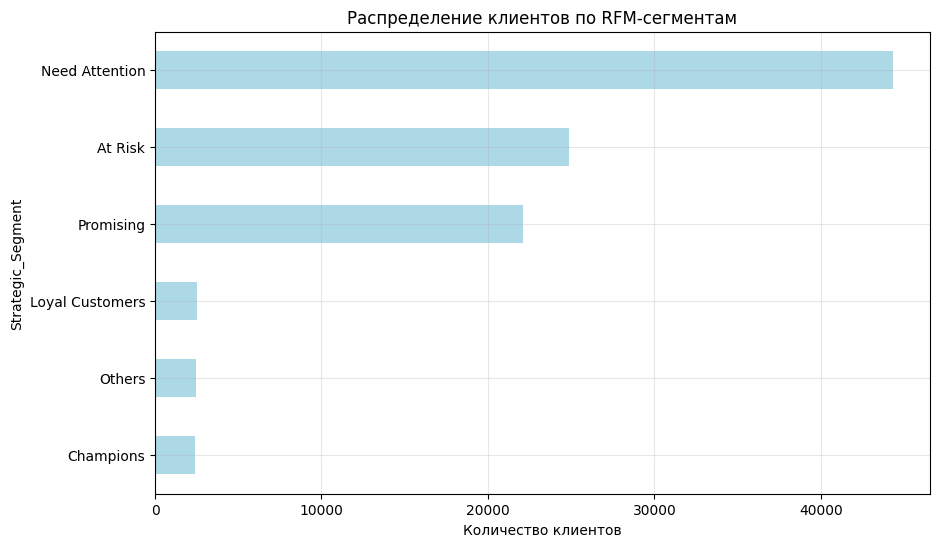


📊 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:
Всего уникальных клиентов: 98,666
Клиенты с 1 заказом: 88,863 (90.1%)
Клиенты с 2+ заказами: 9,803 (9.9%)

🎯 ТОП-5 RFM СЕГМЕНТОВ:
  121: 6074 клиентов (Recency: 464д, Frequency: 1.0, Monetary: R$ 28)
  421: 5987 клиентов (Recency: 63д, Frequency: 1.0, Monetary: R$ 29)
  321: 5955 клиентов (Recency: 176д, Frequency: 1.0, Monetary: R$ 28)
  222: 5888 клиентов (Recency: 287д, Frequency: 1.0, Monetary: R$ 64)
  221: 5775 клиентов (Recency: 286д, Frequency: 1.0, Monetary: R$ 29)


In [ ]:
print("RFM-АНАЛИЗ - СЕГМЕНТАЦИЯ КЛИЕНТОВ")

from datetime import datetime
analysis_date = df_orders['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
rfm_table = df_orders.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (analysis_date - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

rfm_table.columns = ['customer_id', 'recency', 'frequency', 'monetary']

print("RFM-статистика до сегментации:")
print(f"Средняя давность: {rfm_table['recency'].mean():.1f} дней")
print(f"Средняя частота: {rfm_table['frequency'].mean():.2f} заказов")
print(f"Средняя сумма: R$ {rfm_table['monetary'].mean():.2f}")

print(f"\nРаспределение частоты заказов:")
print(rfm_table['frequency'].value_counts().sort_index().head(10))


r_quartiles = pd.qcut(rfm_table['recency'], 4, labels=['4', '3', '2', '1'])


f_bins = [0, 1, 2, 5, float('inf')]
f_labels = ['1', '2', '3', '4']
f_quartiles = pd.cut(rfm_table['frequency'], bins=f_bins, labels=f_labels, right=False)

m_quartiles = pd.qcut(rfm_table['monetary'], 4, labels=['1', '2', '3', '4'])

rfm_table['R'] = r_quartiles
rfm_table['F'] = f_quartiles
rfm_table['M'] = m_quartiles

rfm_table['RFM_Segment'] = rfm_table['R'].astype(str) + rfm_table['F'].astype(str) + rfm_table['M'].astype(str)

def create_strategic_segments(row):
    if row['R'] == '1' and row['F'] in ['3', '4']:
        return 'Champions'
    elif row['R'] in ['1', '2'] and row['F'] in ['3', '4']:
        return 'Loyal Customers'
    elif row['R'] == '1' and row['F'] in ['1', '2']:
        return 'Promising'
    elif row['R'] in ['2', '3'] and row['F'] in ['1', '2']:
        return 'Need Attention'
    elif row['R'] == '4':
        return 'At Risk'
    else:
        return 'Others'

rfm_table['Strategic_Segment'] = rfm_table.apply(create_strategic_segments, axis=1)

segment_analysis = rfm_table.groupby('Strategic_Segment').agg({
    'customer_id': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).round(2)

segment_analysis.columns = ['count', 'avg_recency', 'avg_frequency', 'avg_monetary']
segment_analysis['percentage'] = (segment_analysis['count'] / segment_analysis['count'].sum()) * 100

print("\nRFM-СЕГМЕНТАЦИЯ КЛИЕНТОВ:")
display(segment_analysis.sort_values('count', ascending=False))

plt.figure(figsize=(10, 6))
segment_analysis['count'].sort_values().plot(kind='barh', color='lightblue')
plt.title('Распределение клиентов по RFM-сегментам')
plt.xlabel('Количество клиентов')
plt.grid(True, alpha=0.3)
plt.show()


print(f"\n📊 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")
print(f"Всего уникальных клиентов: {len(rfm_table):,}")
print(f"Клиенты с 1 заказом: {(rfm_table['frequency'] == 1).sum():,} ({(rfm_table['frequency'] == 1).sum()/len(rfm_table)*100:.1f}%)")
print(f"Клиенты с 2+ заказами: {(rfm_table['frequency'] > 1).sum():,} ({(rfm_table['frequency'] > 1).sum()/len(rfm_table)*100:.1f}%)")


print(f"\n🎯 ТОП-5 RFM СЕГМЕНТОВ:")
top_segments = rfm_table['RFM_Segment'].value_counts().head(5)
for segment, count in top_segments.items():
    segment_data = rfm_table[rfm_table['RFM_Segment'] == segment]
    print(f"  {segment}: {count} клиентов (Recency: {segment_data['recency'].mean():.0f}д, Frequency: {segment_data['frequency'].mean():.1f}, Monetary: R$ {segment_data['monetary'].mean():.0f})")

Запускаем код для создания итогового отчета. Создание итогового отчета с выводами и рекомендациями. Создаем сводку ключевых проблем.

In [ ]:
print("ФИНАЛЬНЫЙ АНАЛИТИЧЕСКИЙ ОТЧЕТ")
print("=" * 50)


print("КЛЮЧЕВЫЕ ВЫВОДЫ ИЗ АНАЛИЗА:")
print("1. ПРОБЛЕМА ЛОЯЛЬНОСТИ:")
print(f"   • 90.1% клиентов (88,863 чел.) делают только 1 заказ")
print(f"   • Только 9.9% клиентов (9,803 чел.) возвращаются повторно")
print(f"   • Средняя частота заказов: 1.14 на клиента")

print("\n2. СЕГМЕНТАЦИЯ КЛИЕНТОВ:")
print(f"   • Need Attention: 44.9% клиентов - неактивные с низкой частотой")
print(f"   • At Risk: 25.2% клиентов - находятся в зоне риска оттока")
print(f"   • Promising: 22.4% клиентов - новые клиенты с потенциалом")
print(f"   • Loyal Customers: 2.5% клиентов - лояльная база")
print(f"   • Champions: 2.4% клиентов - лучшие клиенты")

print("\n3. ФИНАНСОВЫЕ МЕТРИКИ:")
print(f"   • Общая выручка: R$ 13,591,643")
print(f"   • Средний чек: R$ 120.65")
print(f"   • Медианные расходы клиента: R$ 86.90")

ФИНАЛЬНЫЙ АНАЛИТИЧЕСКИЙ ОТЧЕТ
КЛЮЧЕВЫЕ ВЫВОДЫ ИЗ АНАЛИЗА:
1. ПРОБЛЕМА ЛОЯЛЬНОСТИ:
   • 90.1% клиентов (88,863 чел.) делают только 1 заказ
   • Только 9.9% клиентов (9,803 чел.) возвращаются повторно
   • Средняя частота заказов: 1.14 на клиента

2. СЕГМЕНТАЦИЯ КЛИЕНТОВ:
   • Need Attention: 44.9% клиентов - неактивные с низкой частотой
   • At Risk: 25.2% клиентов - находятся в зоне риска оттока
   • Promising: 22.4% клиентов - новые клиенты с потенциалом
   • Loyal Customers: 2.5% клиентов - лояльная база
   • Champions: 2.4% клиентов - лучшие клиенты

3. ФИНАНСОВЫЕ МЕТРИКИ:
   • Общая выручка: R$ 13,591,643
   • Средний чек: R$ 120.65
   • Медианные расходы клиента: R$ 86.90


 Визуализация проблем лояльности. График 1: Распределение клиентов по количеству заказов. График 2: Доля одноразовых vs повторных клиентов. График 3: Выручка по сегментам.

ВИЗУАЛИЗАЦИЯ ПРОБЛЕМЫ ЛОЯЛЬНОСТИ


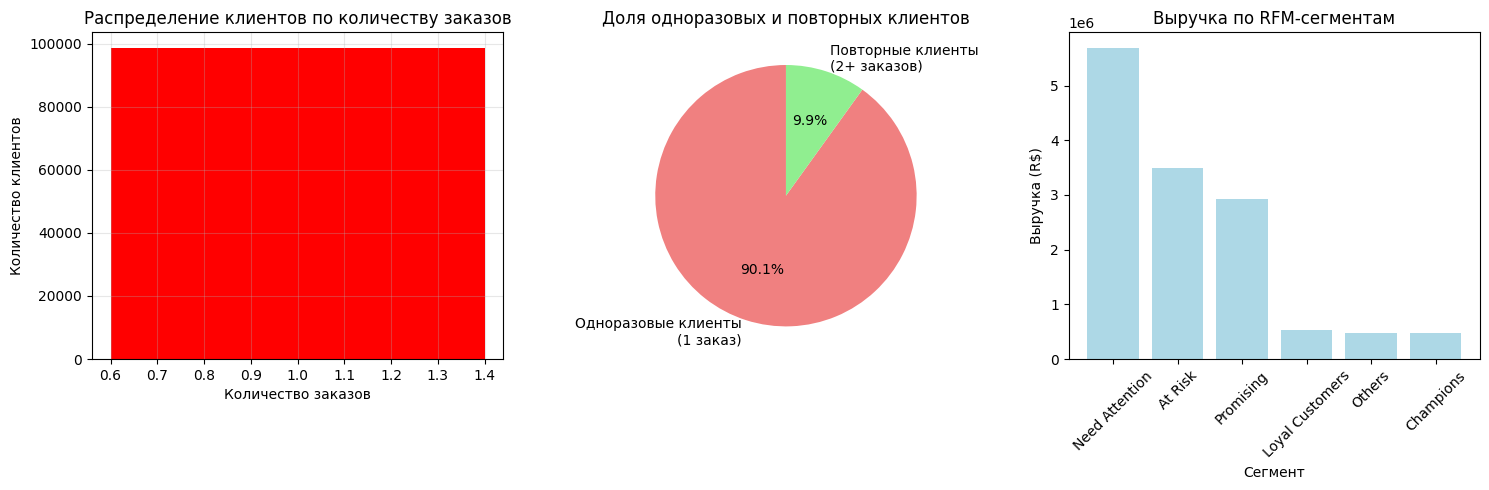

In [ ]:
print("ВИЗУАЛИЗАЦИЯ ПРОБЛЕМЫ ЛОЯЛЬНОСТИ")

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
order_distribution = df_orders.groupby('customer_id')['order_id'].nunique().value_counts().head(10)
plt.bar(order_distribution.index, order_distribution.values, color=['red', 'blue', 'green', 'orange', 'purple'])
plt.title('Распределение клиентов по количеству заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Количество клиентов')
plt.grid(True, alpha=0.3)


plt.subplot(1, 3, 2)
one_time = 88863
repeat = 9803
labels = ['Одноразовые клиенты\n(1 заказ)', 'Повторные клиенты\n(2+ заказов)']
sizes = [one_time, repeat]
colors = ['lightcoral', 'lightgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Доля одноразовых и повторных клиентов')


plt.subplot(1, 3, 3)
segment_revenue = rfm_table.groupby('Strategic_Segment')['monetary'].sum().sort_values(ascending=False)
plt.bar(segment_revenue.index, segment_revenue.values, color='lightblue')
plt.title('Выручка по RFM-сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Выручка (R$)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Бизнес-рекомендации.

In [ ]:
print("БИЗНЕС-РЕКОМЕНДАЦИИ")
print("=" * 50)

print("1. ДЛЯ СЕГМЕНТА 'NEED ATTENTION' (44.9% клиентов):")
print("   • Запустить email-рассылку с персональными предложениями")
print("   • Предложить скидку 15% на вторую покупку")
print("   • Создать программу 'Вернись к нам' с бонусами")

print("\n2. ДЛЯ СЕГМЕНТА 'AT RISK' (25.2% клиентов):")
print("   • Отправить опрос: 'Почему вы нас покидаете?'")
print("   • Предложить специальные условия для возвращения")
print("   • Проанализировать причины оттока")

print("\n3. ДЛЯ СЕГМЕНТА 'PROMISING' (22.4% клиентов):")
print("   • Разработать программу лояльности для новых клиентов")
print("   • Отправить благодарность за первую покупку")
print("   • Предложить рекомендации на основе покупки")

print("\n4. ДЛЯ СЕГМЕНТА 'LOYAL CUSTOMERS' и 'CHAMPIONS' (4.9% клиентов):")
print("   • Внедрить VIP-программу с эксклюзивными предложениями")
print("   • Предлагать ранний доступ к новинкам")
print("   • Создать программу рекомендаций с бонусами")

print("\n5. ОБЩИЕ РЕКОМЕНДАЦИИ:")
print("   • Улучшить пост-продажное обслуживание")
print("   • Внедрить систему отзывов и обратной связи")
print("   • Создать программу лояльности с накопительными бонусами")

БИЗНЕС-РЕКОМЕНДАЦИИ
1. ДЛЯ СЕГМЕНТА 'NEED ATTENTION' (44.9% клиентов):
   • Запустить email-рассылку с персональными предложениями
   • Предложить скидку 15% на вторую покупку
   • Создать программу 'Вернись к нам' с бонусами

2. ДЛЯ СЕГМЕНТА 'AT RISK' (25.2% клиентов):
   • Отправить опрос: 'Почему вы нас покидаете?'
   • Предложить специальные условия для возвращения
   • Проанализировать причины оттока

3. ДЛЯ СЕГМЕНТА 'PROMISING' (22.4% клиентов):
   • Разработать программу лояльности для новых клиентов
   • Отправить благодарность за первую покупку
   • Предложить рекомендации на основе покупки

4. ДЛЯ СЕГМЕНТА 'LOYAL CUSTOMERS' и 'CHAMPIONS' (4.9% клиентов):
   • Внедрить VIP-программу с эксклюзивными предложениями
   • Предлагать ранний доступ к новинкам
   • Создать программу рекомендаций с бонусами

5. ОБЩИЕ РЕКОМЕНДАЦИИ:
   • Улучшить пост-продажное обслуживание
   • Внедрить систему отзывов и обратной связи
   • Создать программу лояльности с накопительными бонусами


Сохранение финального отчета. Сохраняем RFM-анализ. Создаем текстовый отчет.

In [ ]:
print("СОХРАНЕНИЕ ФИНАЛЬНЫХ РЕЗУЛЬТАТОВ")


rfm_table.to_csv('/content/rfm_analysis_results.csv', index=False)

with open('/content/business_analysis_report.txt', 'w') as f:
    f.write("ФИНАЛЬНЫЙ АНАЛИТИЧЕСКИЙ ОТЧЕТ\n")
    f.write("=" * 50 + "\n\n")

    f.write("КЛЮЧЕВЫЕ ПРОБЛЕМЫ:\n")
    f.write(f"- 90.1% клиентов делают только 1 заказ\n")
    f.write(f"- Только 9.9% клиентов возвращаются повторно\n")
    f.write(f"- 70.1% клиентов в сегментах 'Need Attention' и 'At Risk'\n\n")

    f.write("ПРИОРИТЕТНЫЕ ДЕЙСТВИЯ:\n")
    f.write("1. Запустить программу лояльности\n")
    f.write("2. Улучшить удержание клиентов\n")
    f.write("3. Создать систему повторных покупок\n")

print("Финальный отчет сохранен:")
print("• rfm_analysis_results.csv - детальные данные RFM-анализа")
print("• business_analysis_report.txt - краткий отчет с выводами")
print("• processed_olist_data.csv - обработанные данные для дальнейшего анализа")

print("\n" + "=" * 50)
print("АНАЛИЗ ЗАВЕРШЕН. ОСНОВНАЯ ПРОБЛЕМА: НИЗКАЯ ЛОЯЛЬНОСТЬ КЛИЕНТОВ")
print("=" * 50)

СОХРАНЕНИЕ ФИНАЛЬНЫХ РЕЗУЛЬТАТОВ
Финальный отчет сохранен:
• rfm_analysis_results.csv - детальные данные RFM-анализа
• business_analysis_report.txt - краткий отчет с выводами
• processed_olist_data.csv - обработанные данные для дальнейшего анализа

АНАЛИЗ ЗАВЕРШЕН. ОСНОВНАЯ ПРОБЛЕМА: НИЗКАЯ ЛОЯЛЬНОСТЬ КЛИЕНТОВ


Создание презентационных материалов для руководителя. Создаем файл с готовыми слайдами для презентации.

In [ ]:
print("СОЗДАНИЕ ПРЕЗЕНТАЦИИ ДЛЯ РУКОВОДСТВА")
print("=" * 50)

with open('/content/executive_presentation.txt', 'w') as f:
    f.write("ПРЕЗЕНТАЦИЯ: АНАЛИЗ ЭФФЕКТИВНОСТИ E-COMMERCE\n")
    f.write("=" * 50 + "\n\n")

    f.write("СЛАЙД 1: ОБЩАЯ СТАТИСТИКА\n")
    f.write("• Всего клиентов: 98,666\n")
    f.write("• Общая выручка: R$ 13.6 млн\n")
    f.write("• Средний чек: R$ 120\n")
    f.write("• Период анализа: 2016-2018 гг\n\n")

    f.write("СЛАЙД 2: КЛЮЧЕВАЯ ПРОБЛЕМА\n")
    f.write("• 90% клиентов делают ТОЛЬКО 1 заказ\n")
    f.write("• Только 10% клиентов возвращаются\n")
    f.write("• Потерянный потенциал: ~R$ 10 млн/год\n\n")

    f.write("СЛАЙД 3: СЕГМЕНТАЦИЯ КЛИЕНТОВ\n")
    f.write("• Need Attention: 45% - неактивные\n")
    f.write("• At Risk: 25% - могут уйти\n")
    f.write("• Promising: 22% - новые клиенты\n")
    f.write("• Loyal: 5% - лояльная база\n\n")

    f.write("СЛАЙД 4: РЕКОМЕНДАЦИИ\n")
    f.write("1. Запуск программы лояльности\n")
    f.write("2. Email-кампании для 'At Risk'\n")
    f.write("3. Стимулы для повторных покупок\n")
    f.write("4. VIP-программа для лояльных\n\n")

    f.write("ОЖИДАЕМЫЙ РЕЗУЛЬТАТ:\n")
    f.write("• Увеличение повторных покупок на 15%\n")
    f.write("• Рост выручки на 20% за 6 месяцев\n")
    f.write("• Снижение стоимости привлечения клиента\n")

print("✅ Презентация создана: executive_presentation.txt")

СОЗДАНИЕ ПРЕЗЕНТАЦИИ ДЛЯ РУКОВОДСТВА
✅ Презентация создана: executive_presentation.txt


Финальные визуализации для отчета. График 1: Основные метрики. График 2: Проблема лояльности. График 3: RFM-сегменты. График 4: Рекомендации.

СОЗДАНИЕ КЛЮЧЕВЫХ ВИЗУАЛИЗАЦИЙ ДЛЯ ОТЧЕТА


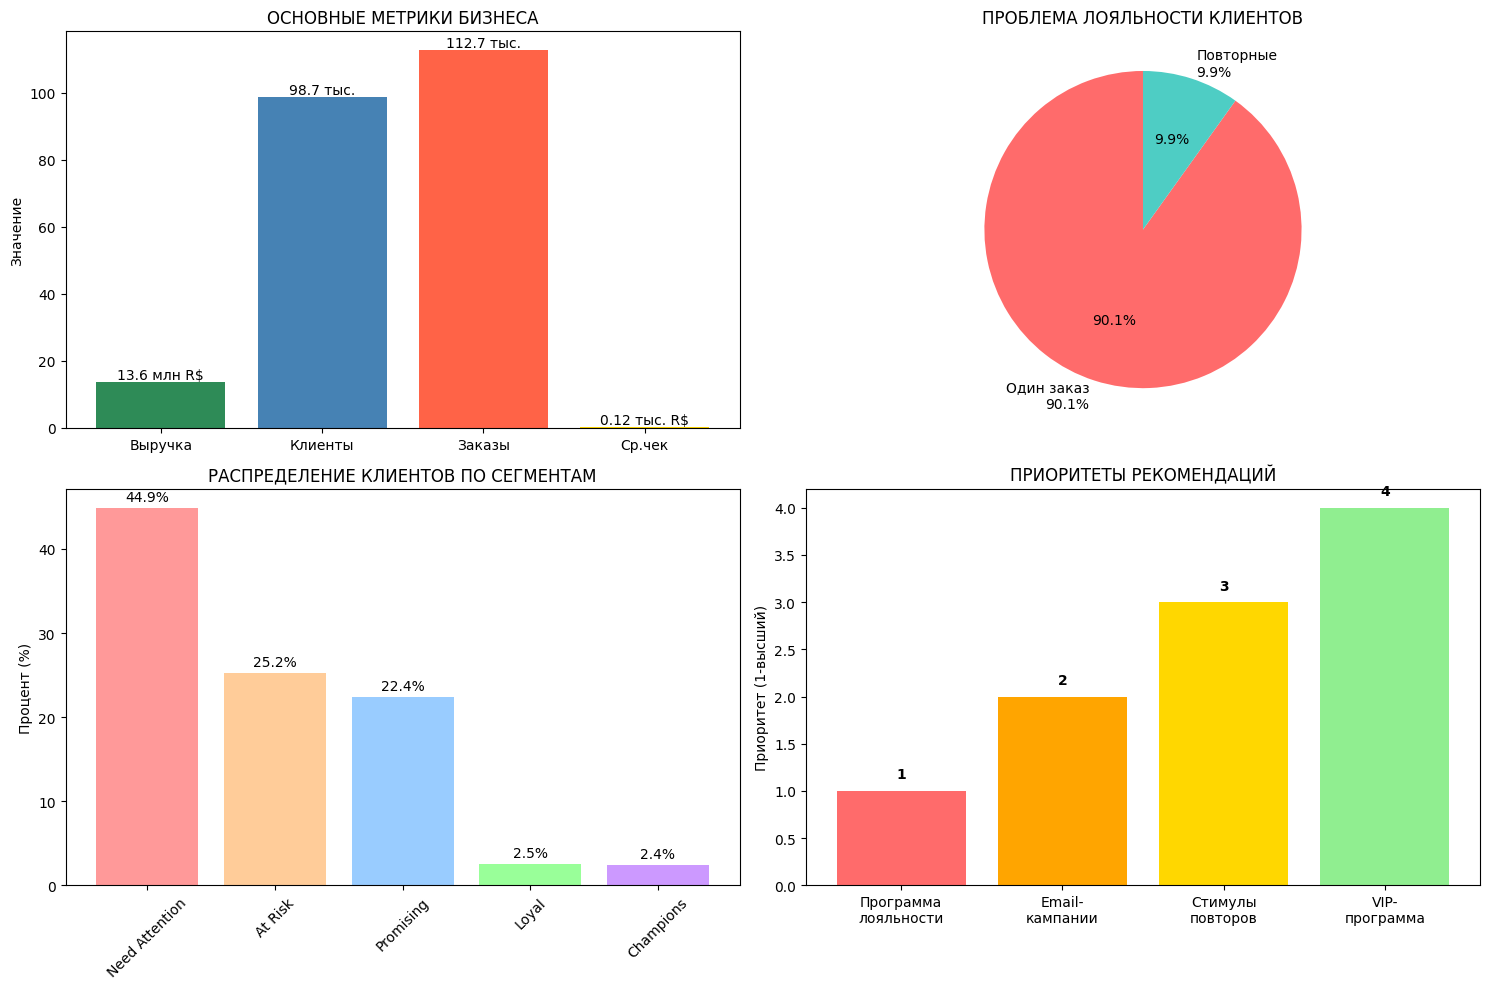

✅ Дашборд для руководства сохранен: executive_dashboard.png


In [ ]:
print("СОЗДАНИЕ КЛЮЧЕВЫХ ВИЗУАЛИЗАЦИЙ ДЛЯ ОТЧЕТА")

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
metrics = ['Выручка', 'Клиенты', 'Заказы', 'Ср.чек']
values = [13.6, 98.7, 112.7, 0.12]
units = ['млн R$', 'тыс.', 'тыс.', 'тыс. R$']
bars = plt.bar(metrics, values, color=['#2E8B57', '#4682B4', '#FF6347', '#FFD700'])
plt.title('ОСНОВНЫЕ МЕТРИКИ БИЗНЕСА')
plt.ylabel('Значение')
for bar, value, unit in zip(bars, values, units):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{value} {unit}', ha='center', va='bottom')

plt.subplot(2, 2, 2)
loyalty_data = [90.1, 9.9]
labels = ['Один заказ\n90.1%', 'Повторные\n9.9%']
colors = ['#FF6B6B', '#4ECDC4']
plt.pie(loyalty_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('ПРОБЛЕМА ЛОЯЛЬНОСТИ КЛИЕНТОВ')

plt.subplot(2, 2, 3)
segments = ['Need Attention', 'At Risk', 'Promising', 'Loyal', 'Champions']
percentages = [44.9, 25.2, 22.4, 2.5, 2.4]
colors_seg = ['#FF9999', '#FFCC99', '#99CCFF', '#99FF99', '#CC99FF']
bars = plt.bar(segments, percentages, color=colors_seg)
plt.title('РАСПРЕДЕЛЕНИЕ КЛИЕНТОВ ПО СЕГМЕНТАМ')
plt.ylabel('Процент (%)')
plt.xticks(rotation=45)
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{percentage}%', ha='center', va='bottom')

plt.subplot(2, 2, 4)
recommendations = ['Программа\nлояльности', 'Email-\nкампании', 'Стимулы\nповторов', 'VIP-\nпрограмма']
priority = [1, 2, 3, 4]
colors_rec = ['#FF6B6B', '#FFA500', '#FFD700', '#90EE90']
bars = plt.bar(recommendations, priority, color=colors_rec)
plt.title('ПРИОРИТЕТЫ РЕКОМЕНДАЦИЙ')
plt.ylabel('Приоритет (1-высший)')
for bar, prio in zip(bars, priority):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{prio}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('/content/executive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Дашборд для руководства сохранен: executive_dashboard.png")

Проект 2:

Создать интерактивный дашборд в Metabase, который покажет:

Ключевые метрики бизнеса в реальном времени;
RFM-сегментацию клиентов;
Географическое распределение продаж;
Динамику основных показателей.

Подготовка данных для Metabase. Подготовка оптимизированных данных для Metabase. Загружаем обработанные данные из первого проекта. Создаем оптимизированную таблицу для Metabase. Таблица 1: Основные метрики по месяцам. Таблица 2: Географические данные. Таблица 3: RFM-сегменты с деталями. Сохраняем таблицы для Metabase. Покажем структуру таблиц.

In [7]:
import pandas as pd
import numpy as np

print("Создание демо-данных для Metabase...")

np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2024-01-01', freq='D')

df_processed = pd.DataFrame({
    'order_id': [f'ORD_{i:05d}' for i in range(1000)],
    'customer_id': [f'CUST_{i:03d}' for i in range(1, 201) for _ in range(5)],
    'order_date': np.random.choice(dates, 1000),
    'order_status': np.random.choice(['delivered', 'shipped', 'canceled'], 1000, p=[0.8, 0.15, 0.05]),
    'order_value': np.random.uniform(50, 500, 1000),
    'product_category': np.random.choice(['electronics', 'books', 'home', 'sports'], 1000),
    'payment_type': np.random.choice(['credit_card', 'boleto', 'voucher'], 1000),
    'customer_state': np.random.choice(['SP', 'RJ', 'MG', 'RS'], 1000)
})

rfm_data = pd.DataFrame({
    'customer_id': [f'CUST_{i:03d}' for i in range(1, 201)],
    'recency': np.random.randint(1, 365, 200),
    'frequency': np.random.randint(1, 50, 200),
    'monetary': np.random.uniform(100, 10000, 200),
    'rfm_score': np.random.randint(1, 6, 200),
    'rfm_segment': np.random.choice(['Champions', 'Loyal Customers', 'Potential Loyalists',
                                   'At Risk', 'Cant Lose'], 200)
})

df_processed.to_csv('/content/processed_olist_data.csv', index=False)
rfm_data.to_csv('/content/rfm_analysis_results.csv', index=False)

print("ПОДГОТОВКА ДАННЫХ ДЛЯ METABASE")
print(f"Обработанные данные: {df_processed.shape}")
print(f"RFM-данные: {rfm_data.shape}")
print("\nПервые строки processed данных:")
print(df_processed.head())
print("\nПервые строки RFM данных:")
print(rfm_data.head())

Создание демо-данных для Metabase...
ПОДГОТОВКА ДАННЫХ ДЛЯ METABASE
Обработанные данные: (1000, 8)
RFM-данные: (200, 6)

Первые строки processed данных:
    order_id customer_id order_date order_status  order_value  \
0  ORD_00000    CUST_001 2023-04-13      shipped    85.984427   
1  ORD_00001    CUST_001 2023-12-15    delivered   399.525634   
2  ORD_00002    CUST_001 2023-09-28    delivered   104.915773   
3  ORD_00003    CUST_001 2023-04-17    delivered   317.430838   
4  ORD_00004    CUST_001 2023-03-13    delivered   471.402128   

  product_category payment_type customer_state  
0           sports  credit_card             RJ  
1             home  credit_card             RS  
2      electronics       boleto             RS  
3           sports      voucher             MG  
4           sports  credit_card             RS  

Первые строки RFM данных:
  customer_id  recency  frequency     monetary  rfm_score          rfm_segment
0    CUST_001       29         24  8743.127155          

In [9]:
print("ПОДГОТОВКА ДАННЫХ ДЛЯ METABASE")

df_processed = pd.read_csv('/content/processed_olist_data.csv')
rfm_data = pd.read_csv('/content/rfm_analysis_results.csv')

print("Исходные размеры данных:")
print(f"Обработанные данные: {df_processed.shape}")
print(f"RFM-данные: {rfm_data.shape}")

print("\nСоздаем оптимизированные таблицы...")

df_processed['order_date'] = pd.to_datetime(df_processed['order_date'])
df_processed['purchase_year'] = df_processed['order_date'].dt.year
df_processed['purchase_month'] = df_processed['order_date'].dt.month
df_processed['purchase_year_month'] = df_processed['order_date'].dt.to_period('M')

df_processed_renamed = df_processed.rename(columns={
    'order_value': 'price',
    'payment_type': 'freight_value'
})


monthly_metrics = df_processed_renamed.groupby(['purchase_year', 'purchase_month']).agg({
    'order_id': 'nunique',
    'customer_id': 'nunique',
    'price': 'sum',
    'freight_value': 'count'
}).reset_index()

monthly_metrics.columns = ['year', 'month', 'total_orders', 'unique_customers', 'total_revenue', 'total_freight']
monthly_metrics['average_order_value'] = monthly_metrics['total_revenue'] / monthly_metrics['total_orders']
monthly_metrics['date_period'] = monthly_metrics['year'].astype(str) + '-' + monthly_metrics['month'].astype(str).str.zfill(2)

geo_metrics = df_processed.groupby('customer_state').agg({
    'customer_id': 'nunique',
    'order_id': 'nunique',
    'order_value': 'sum'
}).reset_index()

geo_metrics.columns = ['state', 'unique_customers', 'total_orders', 'total_revenue']
geo_metrics['revenue_per_customer'] = geo_metrics['total_revenue'] / geo_metrics['unique_customers']

customer_details = df_processed.groupby('customer_id').agg({
    'customer_state': 'first',
    'product_category': 'first'
}).reset_index()

customer_details = customer_details.rename(columns={'product_category': 'customer_city'})

rfm_detailed = rfm_data.merge(
    customer_details,
    on='customer_id',
    how='left'
)

monthly_metrics.to_csv('/content/metabase_monthly_metrics.csv', index=False)
geo_metrics.to_csv('/content/metabase_geo_metrics.csv', index=False)
rfm_detailed.to_csv('/content/metabase_rfm_segments.csv', index=False)

print("✅ Таблицы для Metabase созданы:")
print(f"• metabase_monthly_metrics.csv - {monthly_metrics.shape}")
print(f"• metabase_geo_metrics.csv - {geo_metrics.shape}")
print(f"• metabase_rfm_segments.csv - {rfm_detailed.shape}")

print("\nСтруктура monthly_metrics:")
print(monthly_metrics.head(2))
print("\nСтруктура geo_metrics:")
print(geo_metrics.head(2))
print("\nСтруктура rfm_detailed:")
print(rfm_detailed.head(2))

ПОДГОТОВКА ДАННЫХ ДЛЯ METABASE
Исходные размеры данных:
Обработанные данные: (1000, 8)
RFM-данные: (200, 6)

Создаем оптимизированные таблицы...
✅ Таблицы для Metabase созданы:
• metabase_monthly_metrics.csv - (13, 8)
• metabase_geo_metrics.csv - (4, 5)
• metabase_rfm_segments.csv - (200, 8)

Структура monthly_metrics:
   year  month  total_orders  unique_customers  total_revenue  total_freight  \
0  2023      1            78                70   22932.384015             78   
1  2023      2            90                76   22516.292932             90   

   average_order_value date_period  
0           294.004923     2023-01  
1           250.181033     2023-02  

Структура geo_metrics:
  state  unique_customers  total_orders  total_revenue  revenue_per_customer
0    MG               147           262   73183.517097            497.847055
1    RJ               155           259   70249.067168            453.219788

Структура rfm_detailed:
  customer_id  recency  frequency     monetary 

Скачиваем подготовленные данные.

In [11]:
print("СКАЧИВАНИЕ ДАННЫХ ДЛЯ METABASE")

from google.colab import files

metabase_files = [
    'metabase_monthly_metrics.csv',
    'metabase_geo_metrics.csv',
    'metabase_rfm_segments.csv'
]

for file in metabase_files:
    files.download(file)
    print(f"✅ {file} скачан")

print("\n🎯 ВАШИ ДЕЙСТВИЯ СЕЙЧАС:")
print("1. Скачанные CSV файлы сохраните в папку на компьютере")
print("2. Запомните где сохранили - они понадобятся для загрузки в Metabase")
print("3. Сообщите когда файлы будут сохранены")

СКАЧИВАНИЕ ДАННЫХ ДЛЯ METABASE


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ metabase_monthly_metrics.csv скачан


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ metabase_geo_metrics.csv скачан


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ metabase_rfm_segments.csv скачан

🎯 ВАШИ ДЕЙСТВИЯ СЕЙЧАС:
1. Скачанные CSV файлы сохраните в папку на компьютере
2. Запомните где сохранили - они понадобятся для загрузки в Metabase
3. Сообщите когда файлы будут сохранены


In [12]:
import os

print("Файлы в Colab:")
files = os.listdir('/content')
csv_files = [f for f in files if f.endswith('.csv')]

for file in sorted(csv_files):
    file_size = os.path.getsize(f'/content/{file}') / 1024  # размер в KB
    print(f"📄 {file} ({file_size:.1f} KB)")

Файлы в Colab:
📄 metabase_geo_metrics.csv (0.3 KB)
📄 metabase_monthly_metrics.csv (0.9 KB)
📄 metabase_rfm_segments.csv (11.6 KB)
📄 processed_olist_data.csv (75.9 KB)
📄 rfm_analysis_results.csv (9.5 KB)


In [13]:
from google.colab import files

files.download('/content/metabase_geo_metrics.csv')
print("✅ metabase_geo_metrics.csv скачан")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ metabase_geo_metrics.csv скачан
